In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re
import string
import nltk
import en_core_web_sm
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv('DataScientist.csv',error_bad_lines=False)
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
df.rename(columns = {'Type of ownership':'Ownership','Salary Estimate':'Salary'}, inplace = True)
df.drop(['Unnamed: 0','index'],axis = 1, inplace = True)
df[~df['Salary'].isin(["hour"])]['Salary'].unique()
df = df[~df['Salary'].isin(["hour"])]

df['Salary'] = df['Salary'].apply(lambda x:x.split()[0])
df['Salary'] = df['Salary'].apply(lambda x:x.replace('$',''))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('K',' '))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('(Employer',' '))

def sim(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        tokens[1] = float(tokens[1])
        tokens[0] = float(tokens[0])
        diff = tokens[1] - tokens[0]
        rdm1 = tokens[0] + diff * np.random.uniform(0,1)
        rdm2 = tokens[0] + diff * np.random.uniform(0,1)
        rdm3 = tokens[0] + diff * np.random.uniform(0,1)
        av_rdm = (rdm1+rdm2+rdm3)/3
        return av_rdm
    try:
        return float(x)
    except:
        return None

In [ ]:

df['Salary'] = df['Salary'].apply(sim)

df['Salary'].unique()

df.head()

,Job Title,Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,143.267188,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",145.819138,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,159.376321,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,134.811240,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",156.325275,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
df['Job Description'] = df['Job Description'].apply(lambda x:x.replace("\n", ""))
df['Job Description'] = df['Job Description'].apply(lambda x: x.lower())
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub(' +',' ',x))

(array([9.37e+02, 1.57e+03, 9.87e+02, 3.06e+02, 8.90e+01, 1.40e+01,
        3.00e+00, 2.00e+00, 0.00e+00, 1.00e+00]),
 array([   41. ,  1962.2,  3883.4,  5804.6,  7725.8,  9647. , 11568.2,
        13489.4, 15410.6, 17331.8, 19253. ]),
 <a list of 10 Patch objects>)

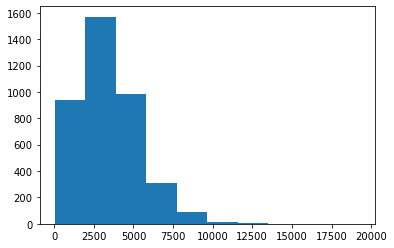

In [ ]:
jd_length = [len(x) for x in df['Job Description']]
plt.hist(jd_length)

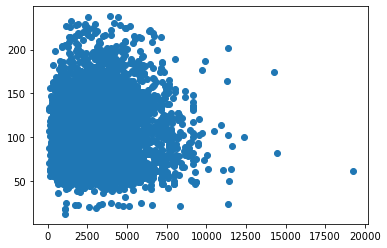

In [ ]:
plt.scatter(jd_length,df['Salary'])

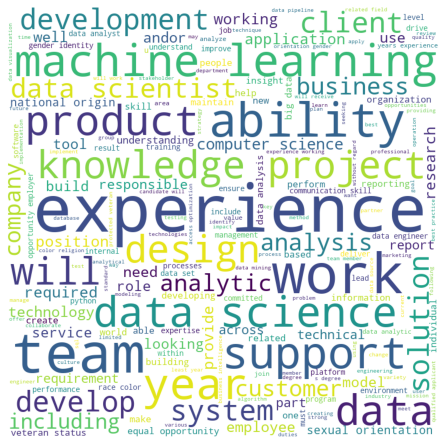

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df['Job Description']:
     
    # split the value
    tokens = val.split()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

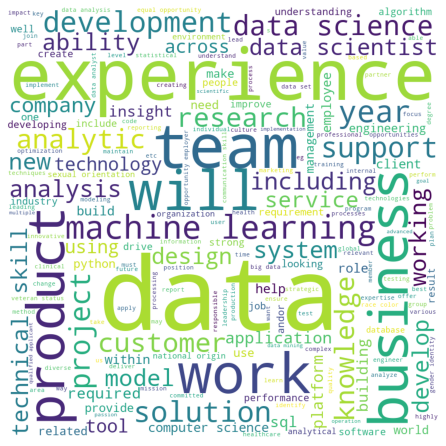

In [ ]:
h_df = df[df['Salary'] > np.percentile(df['Salary'],90)]
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in h_df['Job Description']:
     
    # split the value
    tokens = val.split()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()